# Распространение волн
$ U''+\varkappa^2 \rho(x) U = 0,\quad x\in(0,b) $  
$ \quad U_{xx}+U_{yy}+\varkappa^2 \rho(x) U = 0. $  
Представим волну в виде:  
$ \quad U(x,y) = X(x) e^{i\gamma y}. $  
Тогда для амплитуд получим уравнение:  
\begin{cases}
X''+(\varkappa^2\rho(x)-\gamma^2)X=0, \newline
X(\pm\infty)=0, \newline
\rho(x) = \rho_1, \quad x\in(-\infty,-b) \cup (b,\infty), \newline
\rho(x) = \rho_2, \quad x\in[-b,b],
\end{cases}
Для кусочно-постоянной симметричной функции плотности решение представимо в виде суммы  
$ \quad X_{I} = Ae^{q (x+b)}, \quad X_{II} = B cos(p x), \quad X_{III} = Ae^{-q (x-b)}, $  
где $ \quad -q^2 = \varkappa^2 \rho_1-\gamma^2 < 0, \quad p^2 = \varkappa^2 \rho_2-\gamma^2 > 0. $

#### Сшивание функций дает систему:
\begin{cases}
    A = B cos(p b), \\
    q A = p B sin(p b).
\end{cases}
Характеристическое уравнение которой относительно $A$ и $B$:
$$ \quad p\sin{p b} -q\cos{p b} = 0, $$
$$ \quad \tan{b p} = \dfrac{q}{p}, \quad p(\gamma)=\sqrt{\varkappa^2\rho_2-\gamma^2},
  \quad q(\gamma)=\sqrt{\gamma^2-\varkappa^2\rho_1} $$
Решая последнее уравнение, находим моды $\gamma$.

#### Решим его методом гомотопии.  
Введем параметр $\tau\in[0,1]$ и будем искать решение в виде функции от $\tau$: $\gamma=\gamma(\tau)$.
Перейдем к новым плотностям, зависящим от $\tau$, и при $\tau=\tau_0$ совпадающими со старыми
$\rho_{1\tau_0}, \rho_{2\tau_0}$:  
$ \quad \rho_1(\tau) = \rho_{\tau 1}, $  
$ \quad \rho_2(\tau) = \rho_{\tau 1} + \tau (\rho_{\tau 2}-\rho_{\tau 1}),
    \quad (\Delta\rho\equiv\rho_{\tau 2}-\rho_{\tau 1}). $  
Где константы выражаются как:  
$ \quad \rho_{\tau 1} = \rho_1(\tau_0),$  
$ \quad \rho_{\tau 2} = \rho_1(\tau_0) + \dfrac{\rho_2(\tau_0)-\rho_1(\tau_0)}{\tau}. $  
где $  \quad \rho_1(\tau_0)\equiv\rho_{1\tau_0},\ \rho_2(\tau_0)\equiv\rho_{2\tau_0}. $

In [100]:
b = 2
r1_t0 = 1    # \rho_1(\tau_0)
r2_t0 = 4    # \rho_2(\tau_0)
k = 3     # \kappa

tau0 = 0.1

r_t1 = r1_t0
r_t2 = r1_t0 + (r2_t0-r1_t0)/tau0
dr = r_t2-r_t1;

In [101]:
r2_t0 == r_t1+tau0*(r_t2-r_t1)

true

In [102]:
r1 = r_t1
r2(t) = r_t1+t*dr

p(g,t) = sqrt(k^2*r2(t)-g^2)
q(g) = sqrt(g^2-k^2*r1);

#### Продифференцируем характеристическое уравнение по $\bf{\tau}:$  
$\quad \dfrac{1}{\cos^2(bp)}b\dfrac{\partial p}{\partial\tau}=\dfrac{\partial}{\partial\tau}\dfrac{q}{p},$  
где  
$\quad \dfrac{\partial p}{\partial\tau} = \dfrac{\varkappa^2\Delta\rho-2\gamma\gamma'}{2p},
  \quad \dfrac{\partial}{\partial\tau}\dfrac{q}{p}=\dfrac{1}{p}\dfrac{\gamma\gamma'}{q}-\dfrac{q}{p^2}
  \dfrac{\varkappa^2\Delta\rho-2\gamma\gamma'}{2p}.$  
Получаем уравнение:  
$\quad \dfrac{\partial\gamma}{\partial\tau}=\dfrac{\varkappa^2\Delta\rho}{2\gamma}\dfrac{\dfrac{b}{\cos^2bp}+
  \dfrac{q}{p^2}}{\dfrac{b}{\cos^2bp}+\dfrac{1}{q}+\dfrac{q}{p^2}}$  
или  
$\quad \dfrac{\partial\gamma}{\partial\tau}=\dfrac{\varkappa^2\Delta\rho}{2\gamma}
  \dfrac{1}{1+\dfrac{1}{\dfrac{bq}{\cos^2bp}+\dfrac{q^2}{p^2}}} $

In [190]:
f(g,i,t) = k^2*dr/2g/(1+1/( b*q(g)/cos(b*p(g,t))^2+(q(g)/p(g,t))^2 ));

Заметим, что если расщепить характерестическое уравнение с параметром, приравняв правую и левую часть к $1$,
можно получить следующие частные решения дифференциального уравнения:
\begin{cases}
\gamma^2 = \left[\dfrac{\pi}{b}\left(n+\dfrac{1}{4}\right)\right]^2+\varkappa^2\rho_{\tau 1}, \\
\tau = \dfrac{2}{\varkappa^2\Delta\rho}\left[\dfrac{\pi}{b}\left(n+\dfrac{1}{4}\right)\right]^2,
\end{cases}
или, что то же самое:
\begin{cases}
\gamma = \varkappa\sqrt{\dfrac{\rho_1+\rho_2(\tau)}{2}}, \\
\tau = \dfrac{2}{\varkappa^2\Delta\rho}\left[\dfrac{\pi}{b}\left(n+\dfrac{1}{4}\right)\right]^2.
\end{cases}
Эти точки будем выбирать в качестве начального условия задачи Коши. Прямой проверкой можно убедиться, что при
заданных ($b,\varkappa,\rho_{1\tau_0},\rho_{2\tau_0},\tau_0$) переметрах $n \in \{0, 1, 2, 3\}$.

In [213]:
k*sqrt(r1_t0), k*sqrt(r2_t0)  # \gamma не должен выходить за пределы этого интервала

(3.0, 6.0)

In [260]:
tau1(n) = 2/(k^2*dr)*(pi/b*(n+1/4))^2  # \tau должно быть меньше 0.1
g1(n) = k*sqrt((r1+r2(tau1(n)))/2)
g1(3), tau1(3) # 0,1,2,3

(5.921311013755872, 0.19305128978982658)

In [255]:
g0 = g1(3)
t_span = (tau1(3), tau0);

In [256]:
using DifferentialEquations

function homotopy(f, u0, t_span)
    prob = ODEProblem(f, u0, t_span)
    sol = solve(prob,Tsit5(),reltol=1e-12,abstol=1e-12)
    return sol
end

g = homotopy(f, g0, t_span).u[end]

3.4823679321094443

In [257]:
q0(g) = sqrt(g^2-k^2*r1_t0)
p0(g) = sqrt(k^2*r2_t0-g^2)
residual(g) = tan(b*p0(g)) - q0(g)/p0(g)
residual(g)

4.896916205865409e-12

In [325]:
start_p = []
gammas = []
N = [0,1,2,3]
for n in N
    g0 = g1(n)
    t_span = (tau1(n), tau0)
    push!(gammas, homotopy(f, g0, t_span).u[end])
    push!(start_p, g0)
end
gammas

4-element Array{Any,1}:
 5.957094679335536 
 5.60402272528122  
 4.836496716766467 
 3.4823679321094443

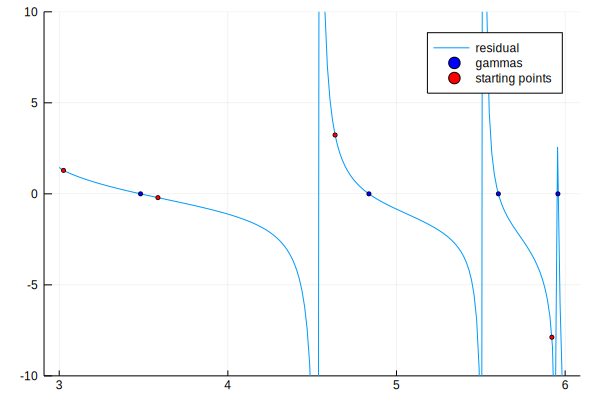

In [326]:
using Plots
g_min, g_max = k*sqrt(r1_t0), k*sqrt(r2_t0)
dg = (g_max-g_min)/200
plot(g_min:dg:g_max,residual.(g_min:dg:g_max),label="residual",ylim=(-10,10))
scatter!(gammas,residual.(gammas),ms=2,c=:blue,label="gammas")
scatter!(start_p,residual.(start_p),ms=2,c=:red,label="starting points")

В качестве собственного вектора матрицы, соответствующей системе:
\begin{cases}
    A = B cos(p b), \\
    q A = p B sin(p b).
\end{cases}
возьмем вектор
\begin{equation}
\begin{pmatrix}
A \\ 
B
\end{pmatrix} =
\begin{pmatrix}
p\sin pb \\ 
q
\end{pmatrix}
\end{equation}

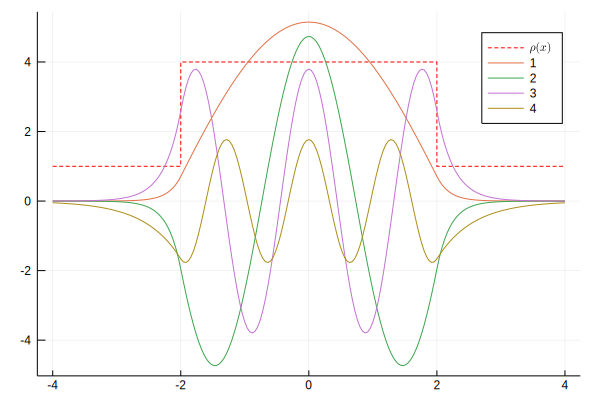

In [328]:
left, right = -4, 4
h = (right-left)/200
x1 = left:h:-b
x2 = -b:h:b
x3 = b:h:right
X1(x,g) = p0(g)*sin(b*p0(g))*exp(+q0(g)*(x+b))
X2(x,g) = q0(g)*cos(x*p0(g))
X3(x,g) = p0(g)*sin(b*p0(g))*exp(-q0(g)*(x-b))
rho1(x) = r1_t0
rho2(x) = r2_t0
plot([x1;x2;x3], [rho1.(x1);rho2.(x2);rho1.(x3)], label=L"\rho(x)", c=:red, ls=:dash)
for (i,gamma) in enumerate(gammas)
    plot!([x1;x2;x3], [X1.(x1,gamma);X2.(x2,gamma);X3.(x3,gamma)],label="$i")
end
plot!()